In [1]:
#library used for data manipulation and analysis
import pandas as pd 
# library used for working with arrays.
import numpy as np 
# library for plots and visualisations
import matplotlib.pyplot as plt 
 # library for visualisations
import seaborn as sns
%matplotlib inline 
# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# this library contains a large number of probability distributions as well as a growing library of statistical functions.
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [258]:
data = pd.read_csv('Deliveries and population data.csv')

In [259]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [260]:
df.head()

,Unnamed: 0,Health facility name,10/1/2018,11/1/2018,12/1/2018,1/1/2019,2/1/2019,3/1/2019,4/1/2019,5/1/2019,...,12/1/2021,1/1/2022,2/1/2022,3/1/2022,4/1/2022,5/1/2022,6/1/2022,7/1/2022,8/1/2022,9/1/2022
0,10,Rwinkwavu DH,163,173,164,173,126,188,210,242,...,284,244,182,225,214,233,257,235,238,244
1,3,Cyarubare,35,32,30,36,29,35,48,37,...,41,48,46,44,56,63,45,40,56,42
2,5,Karama,15,8,18,16,14,15,18,18,...,22,20,17,22,18,19,14,19,21,24
3,6,Ndego,35,28,29,39,30,33,37,37,...,46,43,49,34,33,48,49,46,55,36
4,1,Kageyo I,7,11,11,8,13,14,18,26,...,34,27,24,32,28,20,29,30,19,24


In [261]:
df=df.T
df.head()

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,10,3,5,6,1,2,4,7,8,9
Health facility name,Rwinkwavu DH,Cyarubare,Karama,Ndego,Kageyo I,Rutare,Kabarondo,Nyamirama,Ruramira,Rwinkwavu CS
10/1/2018,163,35,15,35,7,23,42,45,37,50
11/1/2018,173,32,8,28,11,23,36,31,27,44
12/1/2018,164,30,18,29,11,21,46,40,16,38


In [262]:
# Convert the first row into column head

df, df.columns = df[1:] , df.iloc[0]

In [263]:
df.head()

Unnamed: 0,10,3,5,6,1,2,4,7,8,9
Health facility name,Rwinkwavu DH,Cyarubare,Karama,Ndego,Kageyo I,Rutare,Kabarondo,Nyamirama,Ruramira,Rwinkwavu CS
10/1/2018,163,35,15,35,7,23,42,45,37,50
11/1/2018,173,32,8,28,11,23,36,31,27,44
12/1/2018,164,30,18,29,11,21,46,40,16,38
1/1/2019,173,36,16,39,8,16,36,40,25,40


In [264]:
# Convert the first row into column head

df, df.columns = df[1:] , df.iloc[0]

In [265]:
df.head()

Health facility name,Rwinkwavu DH,Cyarubare,Karama,Ndego,Kageyo I,Rutare,Kabarondo,Nyamirama,Ruramira,Rwinkwavu CS
10/1/2018,163,35,15,35,7,23,42,45,37,50
11/1/2018,173,32,8,28,11,23,36,31,27,44
12/1/2018,164,30,18,29,11,21,46,40,16,38
1/1/2019,173,36,16,39,8,16,36,40,25,40
2/1/2019,126,29,14,30,13,13,25,32,23,42


In [266]:
Time_Stamp = pd.date_range(start='2018-10-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', freq='M')

In [267]:
# fixing the names of columns as there are spaces  in columns names
df.columns = [col.replace(" ", "_") for col in df.columns]
df.columns = [col.replace("-", "") for col in df.columns]

In [268]:
# Adding the new column to the original dataset

df['date']=Time_Stamp

In [269]:
df.reset_index(drop=True, inplace=True)
df.head()

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date
0,163,35,15,35,7,23,42,45,37,50,2018-10-31
1,173,32,8,28,11,23,36,31,27,44,2018-11-30
2,164,30,18,29,11,21,46,40,16,38,2018-12-31
3,173,36,16,39,8,16,36,40,25,40,2019-01-31
4,126,29,14,30,13,13,25,32,23,42,2019-02-28


In [270]:
df['maternity_in_cyarubare']=np.where(df['date']<'2020-11-30','before','after')

In [271]:
df.head()

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date,maternity_in_cyarubare
0,163,35,15,35,7,23,42,45,37,50,2018-10-31,before
1,173,32,8,28,11,23,36,31,27,44,2018-11-30,before
2,164,30,18,29,11,21,46,40,16,38,2018-12-31,before
3,173,36,16,39,8,16,36,40,25,40,2019-01-31,before
4,126,29,14,30,13,13,25,32,23,42,2019-02-28,before


In [272]:
# counts the number of months before and after construction in Cyarubare maternity 

df['maternity_in_cyarubare'].value_counts()

before    25
after     23
Name: maternity_in_cyarubare, dtype: int64

In [273]:
df[df['date'].isin(['2018-10-31','2020-10-31'])]

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date,maternity_in_cyarubare
0,163,35,15,35,7,23,42,45,37,50,2018-10-31,before
24,210,50,23,35,19,23,50,42,25,39,2020-10-31,before


In [274]:
# Dropping two months '2018-10-31' and '2020-10-31' in order to have same number and 
# identical months before and afterconstruction in Cyarubare maternity

df.drop([0,24],axis=0,inplace=True)

In [275]:
df.head()

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date,maternity_in_cyarubare
1,173,32,8,28,11,23,36,31,27,44,2018-11-30,before
2,164,30,18,29,11,21,46,40,16,38,2018-12-31,before
3,173,36,16,39,8,16,36,40,25,40,2019-01-31,before
4,126,29,14,30,13,13,25,32,23,42,2019-02-28,before
5,188,35,15,33,14,28,39,43,21,36,2019-03-31,before


In [276]:
# counts the number of months before and after construction in Cyarubare maternity 

df['maternity_in_cyarubare'].value_counts()

before    23
after     23
Name: maternity_in_cyarubare, dtype: int64

## Let us analyze the data and determining whether the establishment of new maternity wing in Cyarubare has significantly raised the number of deliveries. A significance level of 5% has been chosen.

In [286]:
# New dataframe of deliverie before construction of maternity in Cyarubare

df_before=df[df['maternity_in_cyarubare']=='before']
df_before.head()

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date,maternity_in_cyarubare
1,173,32,8,28,11,23,36,31,27,44,2018-11-30,before
2,164,30,18,29,11,21,46,40,16,38,2018-12-31,before
3,173,36,16,39,8,16,36,40,25,40,2019-01-31,before
4,126,29,14,30,13,13,25,32,23,42,2019-02-28,before
5,188,35,15,33,14,28,39,43,21,36,2019-03-31,before


In [287]:
df_before=df_before[['Cyarubare','maternity_in_cyarubare','date']]
df_before.to_csv('before.csv')

In [288]:
# New dataframe of deliverie after construction of maternity in Cyarubare

df_after=df[df['maternity_in_cyarubare']=='after']
df_after.head()

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date,maternity_in_cyarubare
25,190,38,18,34,26,17,28,42,20,37,2020-11-30,after
26,191,49,16,42,22,17,29,30,22,55,2020-12-31,after
27,198,41,22,31,16,20,31,21,22,38,2021-01-31,after
28,204,45,16,41,24,19,33,42,21,38,2021-02-28,after
29,249,58,20,32,28,27,35,34,24,58,2021-03-31,after


In [289]:
df_after=df_after[['Cyarubare','maternity_in_cyarubare','date']]
df_after.to_csv('after.csv')

In [290]:
data1=pd.read_csv('cyarubare.csv')
data1.head()

,Cyarubare_deliverie_before,Cyarubare_deliveries_after
0,32,38
1,30,49
2,36,41
3,29,45
4,35,58


In [291]:
# Checking the shape of the dataset

data1.shape


(23, 2)

In [293]:
#### Checking the data types of the columns for the dataset

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Cyarubare_deliverie_before  23 non-null     int64
 1   Cyarubare_deliveries_after  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [296]:
# Statistical summary of the datase

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Cyarubare_deliverie_before,23.00,35.09,7.77,20.00,29.50,35.00,37.00,55.00
Cyarubare_deliveries_after,23.00,48.39,7.30,38.00,42.50,46.00,56.00,63.00


Observation:
    
* Overall, the average monthly deliveries for 23 months have increased by 37.14 % to approximately 48 deliveries with the maternity wing. 

* The maximum monthly deliveries with the new maternity wing is 63 , which is 14.54% higher than the maximum deliveries before construction of maternity wing

* The minimum monthly deliveries has also increase by 9.5% 

* With the new maternity wing, 50% of the months have deliveries of atleast 46, which has increased by 90% compared before construction of maternity wing

* It can be seen that there is less variation in the monthly deliveries with the new maternity wing

#### Visualize data

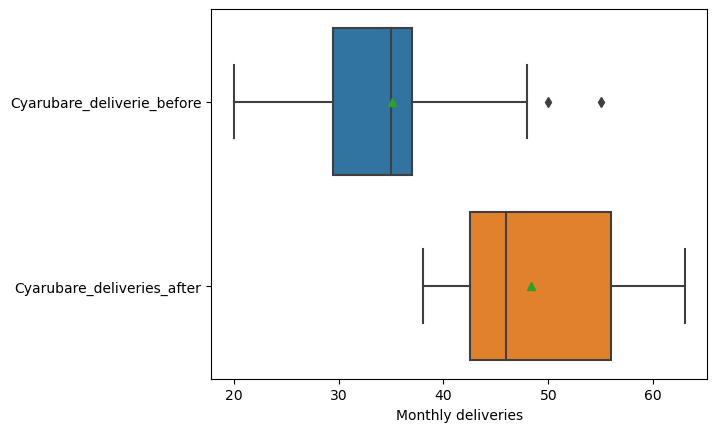

In [401]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=data1,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* It can be observed that the median deliveries is higher after construction of the new maternity wing
* 2  outliers were observed in the monthly deliveries before construction of maternity wing. This suggests that there were extremely high number of deliveries in 2 months 
* Is the observed difference significant enough to conclude about the overall impact of new maternity wing? To detemine this, we will test the difference using a statistical test.

## Hypothesis Testing

### Step 1: Define null and alternative hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean monthly deliveris after construction of maternity wing is equal to that before construction of maternity wing. <br>
$H_a:$ The mean monthly deliveris after construction of maternity wing is greater than before construction of maternity wing.

Let $\mu_1$ and $\mu_2$ be the mean deliveries from after construction of maternity wing  and the mean deliveries from before construction of maternity wing.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

This is a case of a one-tailed test for comparing the means from two populations. As we are comparing two means calculated at different times from the same set of people, the two groups become related (dependent). Also, the population standard deviations are unknown. Hence, a two-sample paired t-test is the most appropriate test for this case.

**Two-sample Paired t-test**

In a two-sample paired t-test, we compare the means from two dependent (related) populations to check if they differ significantly. We are provided that the sample is randomly selected.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [300]:
# create separate variables to store the monthly delivereis before and after construction of new maternity wing
output_after = data1['Cyarubare_deliveries_after']
output_before = data1['Cyarubare_deliverie_before']

### Step 5: Calculate the p-value

- We will use the `ttest_rel` function from the `scipy.stats` library to perform a two-sample paired t-test.
- The `ttest_rel()` function takes the sample observations from the two groups, and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test. 
    - The sample observations are the monthly outputs of the salespersons with respect to the old and the new scheme
    - As it is a one-tailed test, we will compare the mean output from the new scheme with the old scheme by setting the argument `alternative = 'greater'

In [301]:
# import the required function
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value  = ttest_rel(output_after, output_before, alternative = 'greater')  
print('The p-value is', p_value)

The p-value is 2.1082651545436486e-07


### Step 6: Compare the p-value with $\alpha$

In [302]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 2.1082651545436486e-07 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw Inference

At 5% significance level, we reject the null hypothesis. Hence we do have enough statistical evidence to say that the mean monthly deliveries after consctruction of maternity wing is greater than the mean monthly deliveries before consctruction of maternity wing.

## Let us analyze the data and determining whether the establishment of new maternity wing in Cyarubare has significantly raised the number of deliveries compared to other health centers . A significance level of 5% has been chosen.

In [316]:
df.to_csv('data.csv')

In [317]:
data2=pd.read_csv('cyarubare1.csv')
df2=data2.copy()
df2.head()

,maternity_in_cyarubare,health_Center,date,deliveries
0,before,Rwinkwavu_DH,11/30/2018,173
1,before,Cyarubare,11/30/2018,32
2,before,Karama,11/30/2018,8
3,before,Ndego,11/30/2018,28
4,before,Kageyo_I,11/30/2018,11


In [318]:
df2=df2[['maternity_in_cyarubare','health_Center','deliveries']]
df2.head()

,maternity_in_cyarubare,health_Center,deliveries
0,before,Rwinkwavu_DH,173
1,before,Cyarubare,32
2,before,Karama,8
3,before,Ndego,28
4,before,Kageyo_I,11


In [319]:
#checking the number of rows and columns
print('DataFrame contains',df2.shape[0], 'rows and ',df2.shape[1],'columns')

DataFrame contains 460 rows and  3 columns


In [321]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   maternity_in_cyarubare  460 non-null    object
 1   health_Center           460 non-null    object
 2   deliveries              460 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.9+ KB


### Statistical summary

In [336]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
maternity_in_cyarubare,460,2,before,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health_Center,460,10,Rwinkwavu_DH,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deliveries,460.00,NaN,NaN,NaN,50.32,56.95,8.00,22.00,33.00,45.00,284.00


Observation:
    
* On average there are 50 deliveries in all health center
* The maximun number of deliveries in a month is 284 and minimun 8


### Univariate Analysis

In [337]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [338]:
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()

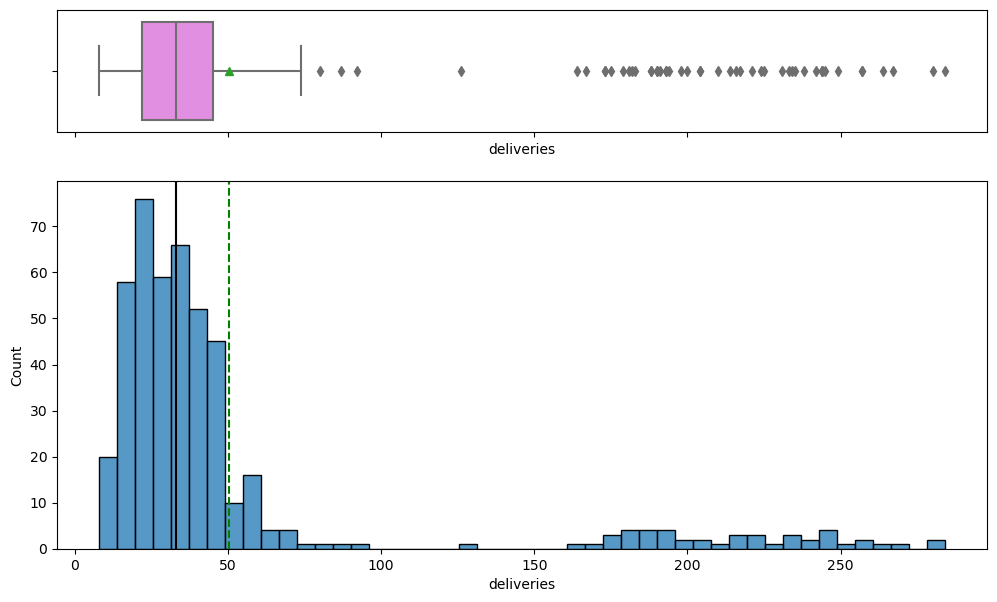

In [339]:
for feature in df2[numerical_col].columns:
    histogram_boxplot(df2[numerical_col], feature, figsize=(12, 7), kde=False, bins=None) 

Observation:
    
* The distribution of deliveries is extremely right skewed, with alot of outliers,this suggest that there is one or more health center that have a huge number of deliveries

### Bivariate Analysis

In [329]:
df2_before=df2[df2['maternity_in_cyarubare']=='before']
df2_after=df2[df2['maternity_in_cyarubare']=='after']

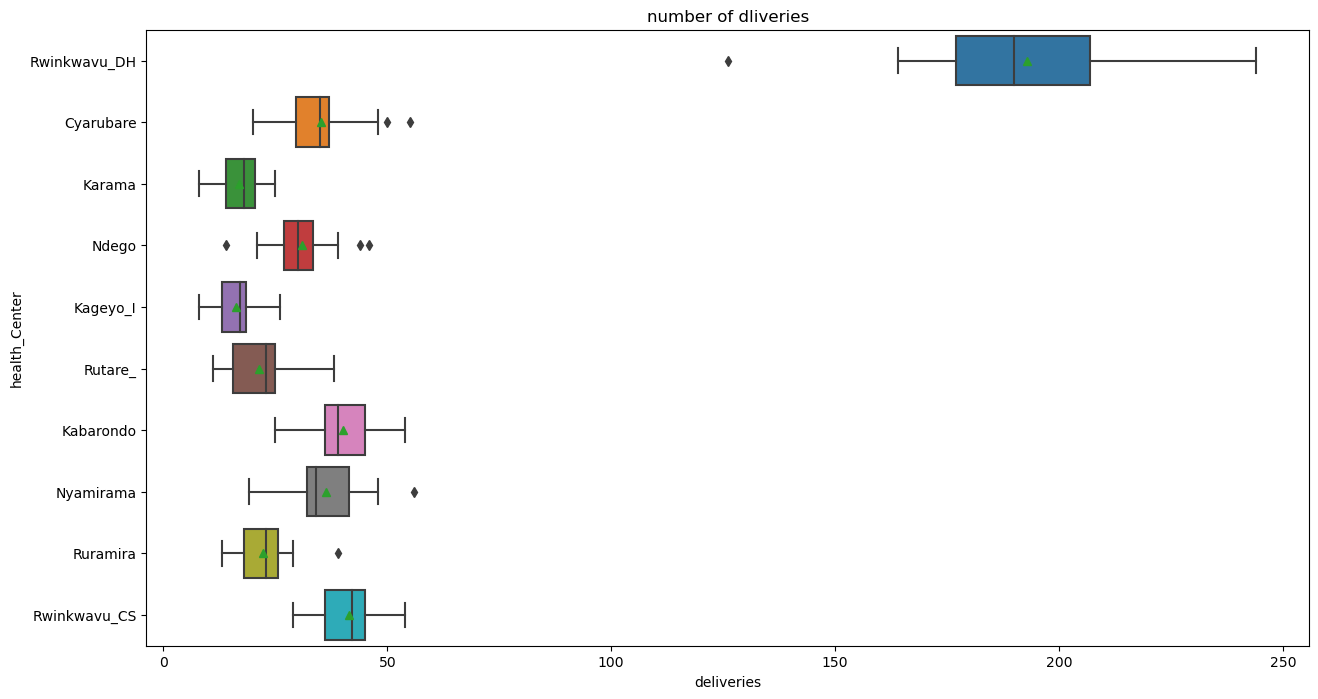

In [343]:
# Displaying boxplot of health center before construction of maternity wing in Cyarubare

plt.figure(figsize=(15,8))
sns.boxplot(data=df2_before ,x='deliveries',y='health_Center',showmeans=True)
plt.title('number of dliveries')
plt.show()

In [335]:
df2_before.groupby(['health_Center'])[['deliveries']].median().sort_values(by='deliveries',ascending=False)

,deliveries
health_Center,
Rwinkwavu_DH,190.00
Rwinkwavu_CS,42.00
Kabarondo,39.00
Cyarubare,35.00
Nyamirama,34.00
Ndego,30.00
Ruramira,23.00
Rutare_,23.00
Karama,18.00


Observation:
    
* It can be observed that before construction of the maternity wing ,Cyarubare was fourth in terms of number of deliveries

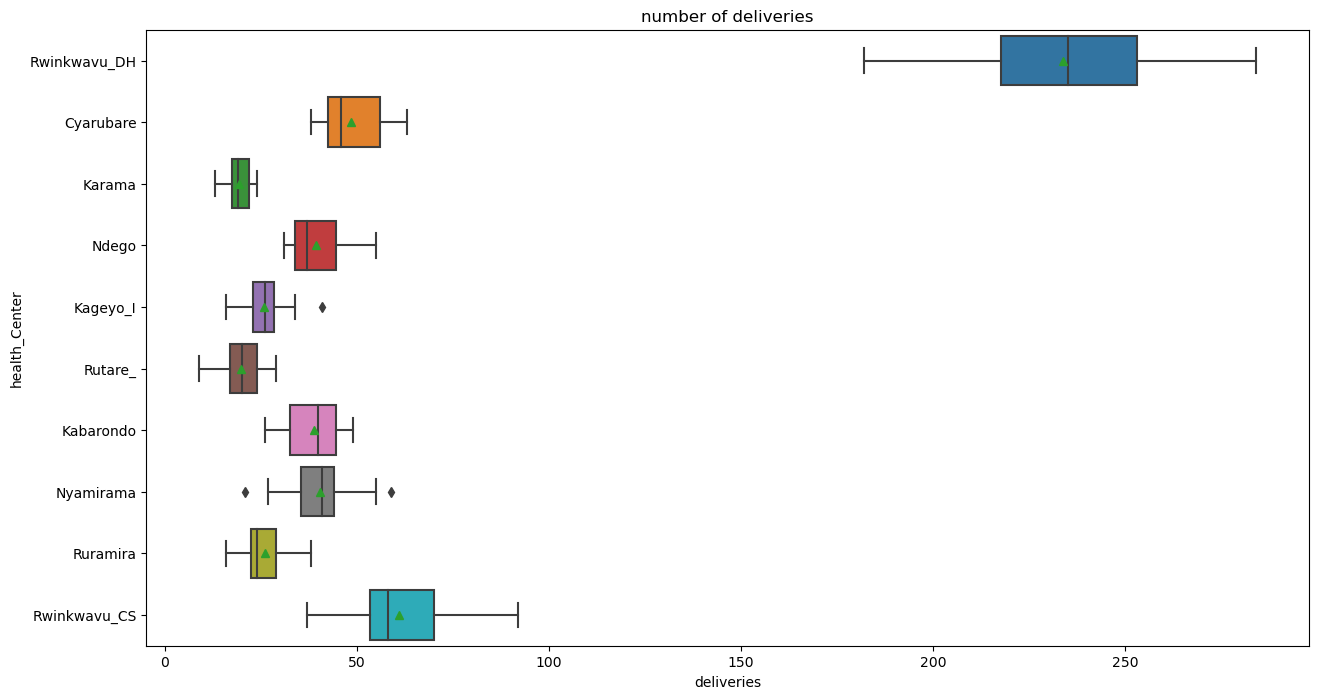

In [344]:
# Displaying boxplot of health center after construction of maternity wing in Cyarubare

plt.figure(figsize=(15,8))
sns.boxplot(data=df2_after ,x='deliveries',y='health_Center',showmeans=True)
plt.title('number of deliveries')
plt.show()

In [342]:
df2_after.groupby(['health_Center'])[['deliveries']].median().sort_values(by='deliveries',ascending=False)

,deliveries
health_Center,
Rwinkwavu_DH,235.00
Rwinkwavu_CS,58.00
Cyarubare,46.00
Nyamirama,41.00
Kabarondo,40.00
Ndego,37.00
Kageyo_I,26.00
Ruramira,24.00
Rutare_,20.00


Observation:
    
It can be observed that after construction of maternity wing ,Cyarubare comes third in terms of number of deliveries

## Let us analyze the level of increase if any in all health center before and after construction of maternity wing in Cyarubare

In [345]:
df.head(1)

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date,maternity_in_cyarubare
1,173,32,8,28,11,23,36,31,27,44,2018-11-30,before


In [346]:
df_before_c=df[df['maternity_in_cyarubare']=='before']
df_before_c.head()

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date,maternity_in_cyarubare
1,173,32,8,28,11,23,36,31,27,44,2018-11-30,before
2,164,30,18,29,11,21,46,40,16,38,2018-12-31,before
3,173,36,16,39,8,16,36,40,25,40,2019-01-31,before
4,126,29,14,30,13,13,25,32,23,42,2019-02-28,before
5,188,35,15,33,14,28,39,43,21,36,2019-03-31,before


In [350]:
Rwinkwavu_DH=df_before_c[['Rwinkwavu_DH']]
Rwinkwavu_DH.to_csv('Rwinkwavu_DH1.csv')

Karama=df_before_c[['Karama']]
Karama.to_csv('Karama1.csv')

Ndego=df_before_c[['Ndego']]
Ndego.to_csv('Ndego1.csv')

Kageyo_I=df_before_c[['Kageyo_I']]
Kageyo_I.to_csv('Kageyo_I1.csv')

Rutare_=df_before_c[['Rutare_']]
Rutare_.to_csv('Rutare_1.csv')

Kabarondo=df_before_c[['Kabarondo']]
Kabarondo.to_csv('Kabarondo1.csv')

Nyamirama=df_before_c[['Nyamirama']]
Nyamirama.to_csv('Nyamirama1.csv')

Ruramira=df_before_c[['Ruramira']]
Ruramira.to_csv('Ruramira1.csv')

Rwinkwavu_CS=df_before_c[['Rwinkwavu_CS']]
Rwinkwavu_CS.to_csv('Rwinkwavu_CS1.csv')


In [351]:
df_after_c=df[df['maternity_in_cyarubare']=='after']
df_after_c.head()

,Rwinkwavu_DH,Cyarubare,Karama,Ndego,Kageyo_I,Rutare_,Kabarondo,Nyamirama,Ruramira,Rwinkwavu_CS,date,maternity_in_cyarubare
25,190,38,18,34,26,17,28,42,20,37,2020-11-30,after
26,191,49,16,42,22,17,29,30,22,55,2020-12-31,after
27,198,41,22,31,16,20,31,21,22,38,2021-01-31,after
28,204,45,16,41,24,19,33,42,21,38,2021-02-28,after
29,249,58,20,32,28,27,35,34,24,58,2021-03-31,after


In [352]:
Rwinkwavu_DH=df_after_c[['Rwinkwavu_DH']]
Rwinkwavu_DH.to_csv('Rwinkwavu_DH2.csv')

Karama=df_after_c[['Karama']]
Karama.to_csv('Karama2.csv')

Ndego=df_after_c[['Ndego']]
Ndego.to_csv('Ndego2.csv')

Kageyo_I=df_after_c[['Kageyo_I']]
Kageyo_I.to_csv('Kageyo_I2.csv')

Rutare_=df_after_c[['Rutare_']]
Rutare_.to_csv('Rutare_2.csv')

Kabarondo=df_after_c[['Kabarondo']]
Kabarondo.to_csv('Kabarondo2.csv')

Nyamirama=df_after_c[['Nyamirama']]
Nyamirama.to_csv('Nyamirama2.csv')

Ruramira=df_after_c[['Ruramira']]
Ruramira.to_csv('Ruramira2.csv')

Rwinkwavu_CS=df_after_c[['Rwinkwavu_CS']]
Rwinkwavu_CS.to_csv('Rwinkwavu_CS2.csv')


In [360]:
Rwinkwavu_DH=pd.read_csv('Rwinkwavu_DH.csv')
Karama=pd.read_csv('Karama.csv')
Ndego=pd.read_csv('Ndego.csv')
Kageyo_I=pd.read_csv('Kageyo_I.csv')
Rutare_=pd.read_csv('Rutare_.csv')
Kabarondo=pd.read_csv('Kabarondo.csv')
Nyamirama=pd.read_csv('Nyamirama.csv')
Ruramira=pd.read_csv('Ruramira.csv')
Rwinkwavu_CS=pd.read_csv('Rwinkwavu_CS.csv')

#### Rwinkwavu_DH

In [362]:
Rwinkwavu_DH=Rwinkwavu_DH[['Rwinkwavu_DH_before','Rwinkwavu_DH_after']]
Rwinkwavu_DH.head()

,Rwinkwavu_DH_before,Rwinkwavu_DH_after
0,173,190
1,164,191
2,173,198
3,126,204
4,188,249


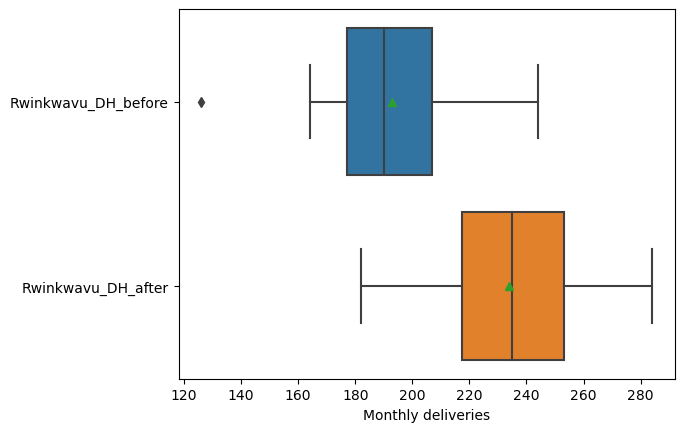

In [397]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Rwinkwavu_DH,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* It can be observed that monthly deliveries has increased in the next 23 months after construction of maternity wing in Cyarubare

In [364]:
Rwinkwavu_DH.describe().T

,count,mean,std,min,25%,50%,75%,max
Rwinkwavu_DH_before,23.00,192.78,26.86,126.00,177.00,190.00,207.00,244.00
Rwinkwavu_DH_after,23.00,233.78,28.34,182.00,217.50,235.00,253.00,284.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have increased by 21.26 % to approximately 233. 



#### Karama

In [365]:
Karama=Karama[['Karama_before','Karama_after']]
Karama.head()

,Karama_before,Karama_after
0,8,18
1,18,16
2,16,22
3,14,16
4,15,20


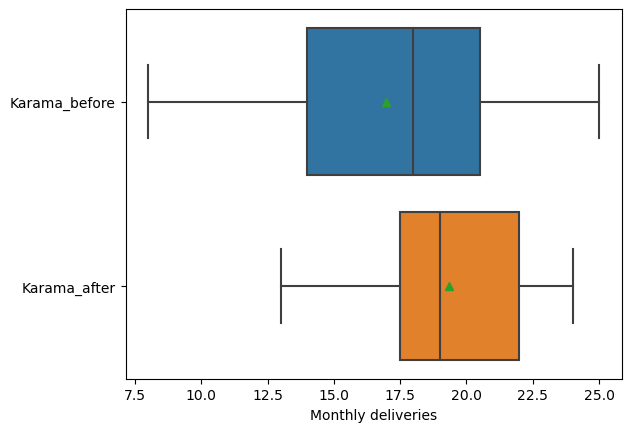

In [396]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Karama,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* It can be observed that monthly deliveries has increased in the next 23 months after construction of maternity wing in Cyarubare


In [366]:
Karama.describe().T

,count,mean,std,min,25%,50%,75%,max
Karama_before,23.00,16.96,4.57,8.00,14.00,18.00,20.50,25.00
Karama_after,23.00,19.35,2.98,13.00,17.50,19.00,22.00,24.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have increased by 14.09 % to approximately 19. 

#### Ndego

In [367]:
Ndego=Ndego[['Ndego_before','Ndego_after']]
Ndego.head()

,Ndego_before,Ndego_after
0,28,34
1,29,42
2,39,31
3,30,41
4,33,32


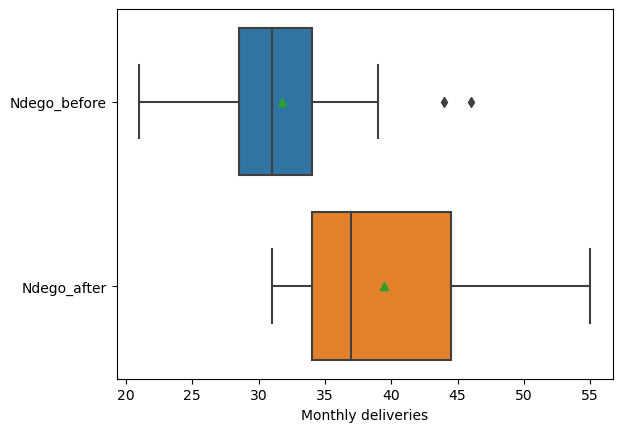

In [395]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Ndego,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* It can be observed that monthly deliveries has increased in the next 23 months after construction of maternity wing in Cyarubare

In [368]:
Ndego.describe().T

,count,mean,std,min,25%,50%,75%,max
Ndego_before,23.00,31.74,6.15,21.00,28.50,31.00,34.00,46.00
Ndego_after,23.00,39.48,6.62,31.00,34.00,37.00,44.50,55.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have increased by 24.38 % to approximately 39.

#### Kageyo_I

In [369]:
Kageyo_I=Kageyo_I[['Kageyo_I_before','Kageyo_I_after']]
Kageyo_I.head()

,Kageyo_I_before,Kageyo_I_after
0,11,26
1,11,22
2,8,16
3,13,24
4,14,28


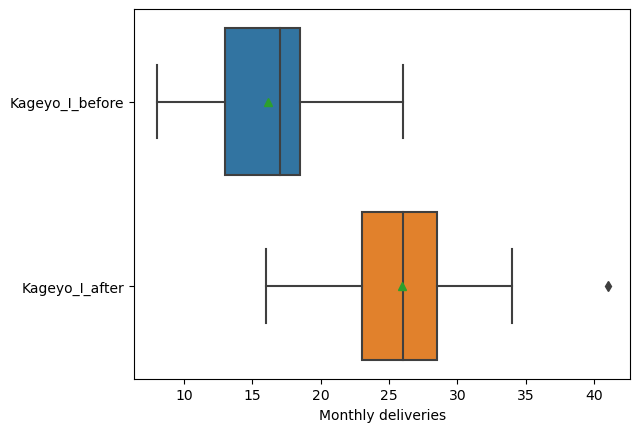

In [394]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Kageyo_I,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* It can be observed that monthly deliveries has significantly increased in the next 23 months after construction of maternity wing in Cyarubare

In [370]:
Kageyo_I.describe().T

,count,mean,std,min,25%,50%,75%,max
Kageyo_I_before,23.00,16.17,4.53,8.00,13.00,17.00,18.50,26.00
Kageyo_I_after,23.00,25.96,5.65,16.00,23.00,26.00,28.50,41.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have increased by 60.54 % to approximately 26.

#### Rutare_

In [371]:
Rutare_=Rutare_[['Rutare_before','Rutare_after']]
Rutare_.head()

,Rutare_before,Rutare_after
0,23,17
1,21,17
2,16,20
3,13,19
4,28,27


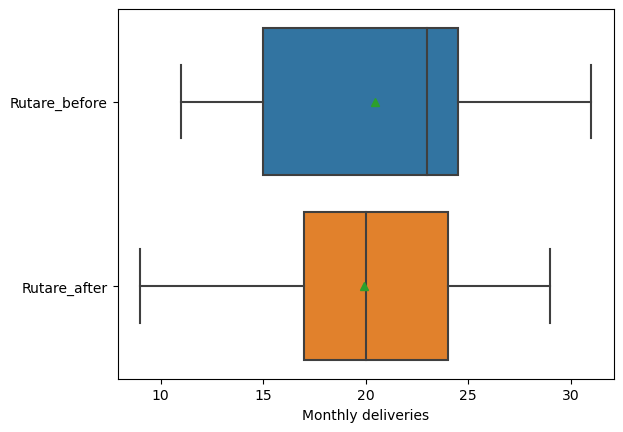

In [393]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Rutare_,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* The monthly deliveries has decreased in the next 23 months following the construction of maternity wing in Cyarubare

In [372]:
Rutare_.describe().T

,count,mean,std,min,25%,50%,75%,max
Rutare_before,23.00,20.43,5.77,11.00,15.00,23.00,24.50,31.00
Rutare_after,23.00,19.91,5.27,9.00,17.00,20.00,24.00,29.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have dereased by 2.54% to approximately 20.

#### Kabarondo

In [373]:
Kabarondo=Kabarondo[['Kabarondo_before','Kabarondo_after']]
Kabarondo.head()

,Kabarondo_before,Kabarondo_after
0,36,28
1,46,29
2,36,31
3,25,33
4,39,35


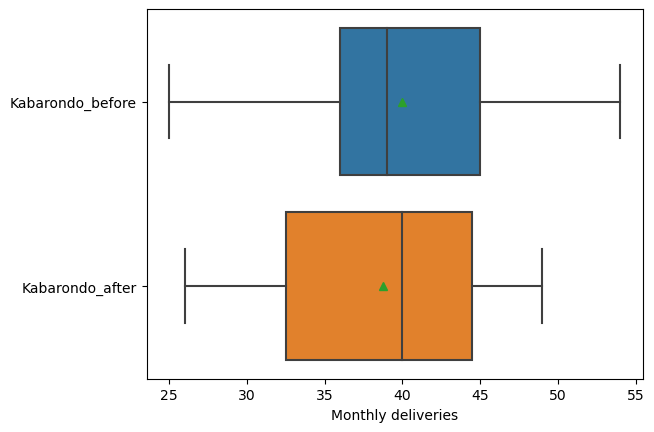

In [392]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Kabarondo,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* The monthly deliveries has slighly decreased in the next 23 months following the construction of maternity wing in Cyarubare

In [374]:
Kabarondo.describe().T

,count,mean,std,min,25%,50%,75%,max
Kabarondo_before,23.00,39.96,6.96,25.00,36.00,39.00,45.00,54.00
Kabarondo_after,23.00,38.74,7.05,26.00,32.50,40.00,44.50,49.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have dereased by 3.05% to approximately 39.

#### Nyamirama

In [375]:
Nyamirama=Nyamirama[['Nyamirama_before','Nyamirama_after']]
Nyamirama.head()

,Nyamirama_before,Nyamirama_after
0,31,42
1,40,30
2,40,21
3,32,42
4,43,34


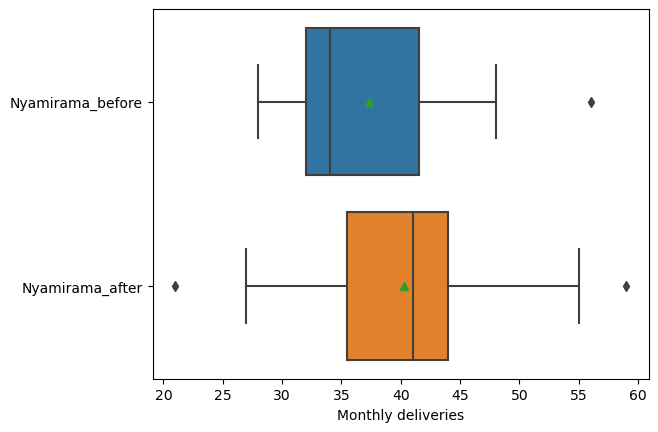

In [398]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Nyamirama,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* The monthly deliveries has increased in the next 23 months following the construction of maternity wing in Cyarubare

In [377]:
Nyamirama.describe().T

,count,mean,std,min,25%,50%,75%,max
Nyamirama_before,23.00,37.30,7.00,28.00,32.00,34.00,41.50,56.00
Nyamirama_after,23.00,40.30,8.99,21.00,35.50,41.00,44.00,59.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have dereased by 8.04% to approximately 40.

#### Ruramira

In [378]:
Ruramira=Ruramira[['Ruramira_before','Ruramira_after']]
Ruramira.head()

,Ruramira_before,Ruramira_after
0,27,20
1,16,22
2,25,22
3,23,21
4,21,24


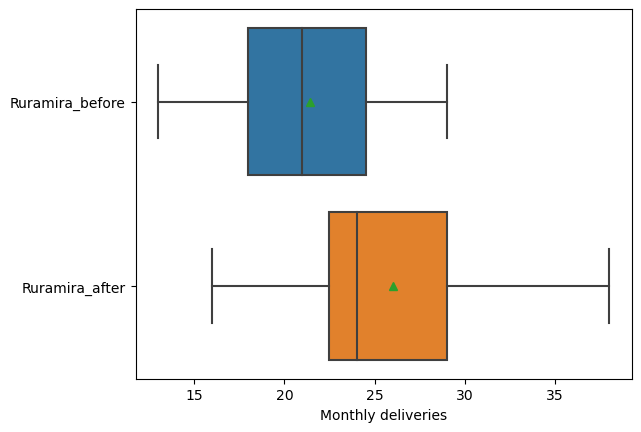

In [399]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Ruramira,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* The monthly deliveries has increased in the next 23 months following the construction of maternity wing in Cyarubare

In [380]:
Ruramira.describe().T

,count,mean,std,min,25%,50%,75%,max
Ruramira_before,23.00,21.43,4.49,13.00,18.00,21.00,24.50,29.00
Ruramira_after,23.00,26.04,5.15,16.00,22.50,24.00,29.00,38.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have dereased by 21.51% to approximately 26.

#### Rwinkwavu_CS

In [382]:
Rwinkwavu_CS=Rwinkwavu_CS[['Rwinkwavu_CS_before','Rwinkwavu_CS_after']]
Rwinkwavu_CS.head()

,Rwinkwavu_CS_before,Rwinkwavu_CS_after
0,44,37
1,38,55
2,40,38
3,42,38
4,36,58


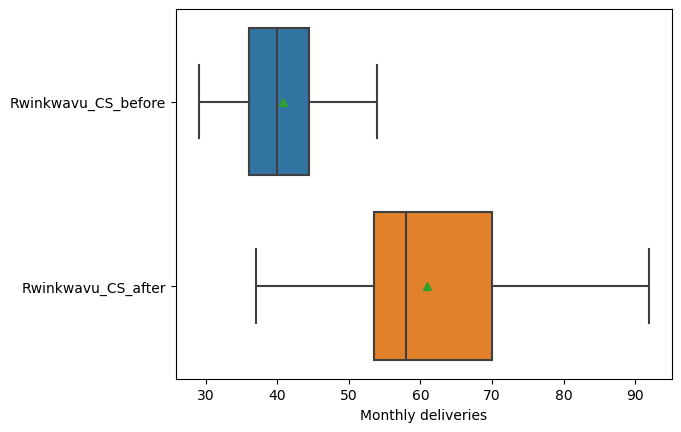

In [400]:
# visual analysis of the monthly deliveries before and after construction of maternity wing
sns.boxplot(data=Rwinkwavu_CS,orient='h',showmeans=True,showfliers=True)
plt.xlabel('Monthly deliveries')
plt.show()

Observation:
    
* The monthly deliveries has significantly increased in the next 23 months following the construction of maternity wing in Cyarubare

In [383]:
Rwinkwavu_CS.describe().T

,count,mean,std,min,25%,50%,75%,max
Rwinkwavu_CS_before,23.00,40.87,6.28,29.00,36.00,40.00,44.50,54.00
Rwinkwavu_CS_after,23.00,60.96,14.59,37.00,53.50,58.00,70.00,92.00


Observation:
    
    
* Overall, the average monthly deliveries for 23 months after construction of maternity wing in Cyarubare have dereased by 49.15% to approximately 67.

# Conclusion
    


* There is a strong evidence that the number of deliveries have increased in Cyarubare after construction of a new maternity  

* Cyarubare had an increase of 37.14% in number of deliveries which is the third highest after Kageyo_I with 60.54% increase and Rwinkwavu_CS with 49.15% increase